<a href="https://colab.research.google.com/github/ramya940758/Ramya-mundru/blob/main/mundru_exercise_05_04182023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The fifth in-class-exercise (40 points in total, 4/18/2023)**

(20 points) The purpose of the question is to practice different machine learning algorithms for text classification as well as the performance evaluation. In addition, you are requried to conduct *10 fold cross validation (https://scikit-learn.org/stable/modules/cross_validation.html)* in the training.

The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data.

Algorithms:

(1) MultinominalNB

(2) SVM

(3) KNN

(4) Decision tree

(5) Random Forest

(6) XGBoost

(7) Word2Vec

(8) BERT

Evaluation measurement:

(1) Accuracy

(2) Recall

(3) Precison

(4) F-1 score

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
def get_text_data(file_name):
  with open(file_name) as txtf:
      mylist = [line.strip('\n') for line in txtf]

  labels = []
  text = []

  for i, line in enumerate(mylist):
      label = mylist[i][0]
      tex = mylist[i][1:]
      labels.append(label)
      text.append(tex)
  return labels, text

train_data = get_text_data("stsa-train.txt")
train_df = pd.DataFrame(list(zip(train_data[0], train_data[1])),columns =['Reviews', 'Text'])
import nltk, re, string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from textblob import Word
nltk.download('stopwords')
nltk.download("wordnet")
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer

def tokenize_sentence(s):
  # reviews = []
  # for x in s:
  #   reviews.append(nltk.word_tokenize(x))
  st = PorterStemmer()
  lemmatizer = WordNetLemmatizer()
  tokenizer = RegexpTokenizer(r'\w+')
  tokens = tokenizer.tokenize(s)
  stem_words=[st.stem(w) for w in tokens]
  lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
  return " ".join(tokens)

def remove_puntutation_and_special_chars(s):
  """
    params1: string containing sentence
    return: string with no punctuations
  """
  # punctuation = """!()-[]{};+|=-_~`:'"\,<>./?@#$%^&*_~"""
  # s1 = s1.replace(punctuation, "")
  s = s.replace('{html}',"")
  s = re.sub(r'http\S+', '',s)
  cleanr = re.compile('<.*?>')
  cleantext = re.sub(cleanr, '', s)
  # return cleantext
  return "".join([x for x in cleantext if x not in string.punctuation])

def remove_nums(s):
  return re.sub(r'[0-9]+', '', s)

def remove_stopwords(s):
  stop = stopwords.words("english")
  return " ".join(x for x in s.split() if len(x)>2 if x not in stop)

def lower_all(s):
  return " ".join(x.lower() for x in s.split())

train_df["text_modified"] = train_df["Text"].replace("\n","")
operations = [remove_puntutation_and_special_chars, remove_nums, lower_all, remove_stopwords]
for op in operations:
  train_df["text_modified"] = train_df["text_modified"].apply(op)
train_df['tls'] = train_df['text_modified'].apply(tokenize_sentence)
test_data = get_text_data("stsa-test.txt")
test_df = pd.DataFrame(list(zip(test_data[0], test_data[1])),columns =['Reviews', 'Text'])
test_df["text_modified"] = test_df["Text"].replace("\n","")
operations = [remove_puntutation_and_special_chars, remove_nums, lower_all, remove_stopwords]
for op in operations:
  test_df["text_modified"] = test_df["text_modified"].apply(op)
test_df['tls'] = test_df['text_modified'].apply(tokenize_sentence)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
#TF-IDF Vectorization

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(lowercase = False, analyzer='word')
train_tfidf = tfidf_vectorizer.fit_transform(train_df["tls"]).toarray()
test_tfidf = tfidf_vectorizer.transform(test_df["tls"]).toarray()
x_valid, y_valid = test_tfidf, test_df['Reviews']
#Splitting the data into train and test

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(train_tfidf, train_df["Reviews"],test_size = 0.2, random_state = 202)
y_test_dup = y_test.astype(int)
#Implemeting train and test the models
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
# classification report
from sklearn.metrics import classification_report

def train_model(model, x_train, y_train, x_test, model_name):
  classifier = model
  model = classifier.fit(x_train, y_train)
  predictions_validation_set = classifier.predict(x_test)

  print(f"Accuracy of the {model_name} on train: {round(accuracy_score(y_test, predictions_validation_set)*100)}%")
  print(f"Percision of the {model_name} on train: { round(precision_score(y_test, predictions_validation_set, pos_label='0')*100)}%")
  print(f"Recall of the {model_name} on train: {round(recall_score(y_test, predictions_validation_set, pos_label='0')*100)}%")
  print(f"F1 Score of the {model_name} on train: { round(f1_score(y_test, predictions_validation_set, pos_label='0')*100)}%")

  cr_naive_validation = classification_report(y_test, predictions_validation_set)
  print("Classification Report on train: ", "\n", "\n",cr_naive_validation)

  return model
def test_model(model, x_valid, y_valid, model_name):
  predictions_test_set = model.predict(x_valid)

  print(f"Accuracy of the {model_name} on test: {round(accuracy_score(y_valid, predictions_test_set)*100)}%")
  print(f"Percision of the {model_name} on test: { round(precision_score(y_valid, predictions_test_set, pos_label='0')*100)}%")
  print(f"Recall of the {model_name} on test: {round(recall_score(y_valid, predictions_test_set, pos_label='0')*100)}%")
  print(f"F1 Score of the {model_name} on test: { round(f1_score(y_valid, predictions_test_set, pos_label='0')*100)}%")

  cr_naive_test = classification_report(y_valid, predictions_test_set)
  print("Classification Report on test: ", "\n", "\n",cr_naive_test)

In [ ]:
#MultinomialNB
from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB()
model_nb = train_model(MultinomialNB(), x_train, y_train, x_test, "Naive Bayes Model")
from sklearn.model_selection import cross_val_score
naive_accuracies_validation = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)

print(f"Naive Bayes Model  10-fold cross validation on train:  {round(naive_accuracies_validation.mean()*100)}%")
test_model(model_nb, x_valid, y_valid, "Naive Bayes Model")
naive_accuracies_test = cross_val_score(estimator = classifier, X = x_valid, y = y_valid, cv = 10)
print(f"Naive Bayes Model 10-fold cross validation score on testing set is :  {round(naive_accuracies_test.mean()*100)}%")


Accuracy of the Naive Bayes Model on train: 79%
Percision of the Naive Bayes Model on train: 83%
Recall of the Naive Bayes Model on train: 70%
F1 Score of the Naive Bayes Model on train: 76%
Classification Report on train:  
 
               precision    recall  f1-score   support

           0       0.83      0.70      0.76       667
           1       0.76      0.87      0.81       717

    accuracy                           0.79      1384
   macro avg       0.80      0.79      0.79      1384
weighted avg       0.79      0.79      0.79      1384

Naive Bayes Model  10-fold cross validation on train:  77%
Accuracy of the Naive Bayes Model on test: 79%
Percision of the Naive Bayes Model on test: 85%
Recall of the Naive Bayes Model on test: 71%
F1 Score of the Naive Bayes Model on test: 77%
Classification Report on test:  
 
               precision    recall  f1-score   support

           0       0.85      0.71      0.77       912
           1       0.75      0.87      0.81       909


In [ ]:
#SVM
from sklearn import svm

classifier_svm = svm.LinearSVC()
model_svm = train_model(classifier_svm, x_train, y_train, x_test, "SVM model")
svm_accuracies_validation = cross_val_score(estimator = classifier_svm, X = x_train, y = y_train, cv = 10)

print(f"SVM Model  10-fold cross validation on train:  {round(svm_accuracies_validation.mean()*100)}%")
test_model(model_svm, x_valid, y_valid, "SVM Model")
svm_accuracies_test = cross_val_score(estimator = classifier_svm, X = x_valid, y = y_valid, cv = 10)
print(f"SVM Model 10-fold cross validation score on testing set is :  {round(svm_accuracies_test.mean()*100)}%")

Accuracy of the SVM model on train: 78%
Percision of the SVM model on train: 77%
Recall of the SVM model on train: 77%
F1 Score of the SVM model on train: 77%
Classification Report on train:  
 
               precision    recall  f1-score   support

           0       0.77      0.77      0.77       667
           1       0.79      0.79      0.79       717

    accuracy                           0.78      1384
   macro avg       0.78      0.78      0.78      1384
weighted avg       0.78      0.78      0.78      1384

SVM Model  10-fold cross validation on train:  76%
Accuracy of the SVM Model on test: 79%
Percision of the SVM Model on test: 80%
Recall of the SVM Model on test: 77%
F1 Score of the SVM Model on test: 78%
Classification Report on test:  
 
               precision    recall  f1-score   support

           0       0.80      0.77      0.78       912
           1       0.77      0.81      0.79       909

    accuracy                           0.79      1821
   macro avg     

In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

classifier_knn = KNeighborsClassifier(n_neighbors = 15)
model_knn = train_model(classifier_knn, x_train, y_train, x_test, "KNN model")
knn_accuracies_validation = cross_val_score(estimator = classifier_knn, X = x_train, y = y_train, cv = 10)

print(f"KNN Model  10-fold cross validation score on training set is :  {round(knn_accuracies_validation.mean()*100)}%")
test_model(model_knn, x_valid, y_valid, "KNN Model")
knn_accuracies_test = cross_val_score(estimator = classifier_knn, X = x_valid, y = y_valid, cv = 10)

print(f"KNN Model 10-fold cross validation score on testing set is :  {round(knn_accuracies_test.mean()*100)}%")


Accuracy of the KNN model on train: 74%
Percision of the KNN model on train: 71%
Recall of the KNN model on train: 79%
F1 Score of the KNN model on train: 75%
Classification Report on train:  
 
               precision    recall  f1-score   support

           0       0.71      0.79      0.75       667
           1       0.78      0.70      0.74       717

    accuracy                           0.74      1384
   macro avg       0.75      0.75      0.74      1384
weighted avg       0.75      0.74      0.74      1384

KNN Model  10-fold cross validation score on training set is :  71%
Accuracy of the KNN Model on test: 73%
Percision of the KNN Model on test: 72%
Recall of the KNN Model on test: 77%
F1 Score of the KNN Model on test: 74%
Classification Report on test:  
 
               precision    recall  f1-score   support

           0       0.72      0.77      0.74       912
           1       0.75      0.70      0.72       909

    accuracy                           0.73      1821


In [ ]:
#XGBoost
y_train_dup = y_train.astype(int)
y_train_dup.dtype
from xgboost import XGBClassifier

classifier_xgb = XGBClassifier()
# model_xgb = train_model(classifier_xgb, x_train, y_train_dup, x_test, "XG Boost model")

model_xgb = classifier_xgb.fit(x_train, y_train_dup)
predictions_validation_set = model_xgb.predict(x_test)

print(f"Accuracy of the XG Boost model on train: {round(accuracy_score(y_test_dup, predictions_validation_set)*100)}%")
print(f"Percision of the XG Boost model on train: { round(precision_score(y_test_dup, predictions_validation_set)*100)}%")
print(f"Recall of the XG Boost model on train: {round(recall_score(y_test_dup, predictions_validation_set)*100)}%")
print(f"F1 Score of the XG Boost model on train: { round(f1_score(y_test_dup, predictions_validation_set)*100)}%")

cr_naive_validation = classification_report(y_test_dup, predictions_validation_set)
print("Classification Report on train: ", "\n", "\n",cr_naive_validation)
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

classifier_xgb = XGBClassifier()
xgb_accuracies_validation = cross_val_score(estimator = classifier_xgb, X = x_train, y = y_train_dup, cv = 10)

print(f"XGBoost Model  10-fold cross validation score on training set is :  {round(xgb_accuracies_validation.mean()*100)}%")
y_valid_dup = y_valid.astype(int)
y_valid_dup.dtype
# test_model(model_xgb, x_valid, y_valid, "XG Boost Model")
predictions_test_set = model_xgb.predict(x_valid)

print(f"Accuracy of the XG Boost model on train: {round(accuracy_score(y_valid_dup, predictions_test_set)*100)}%")
print(f"Percision of the XG Boost model on train: { round(precision_score(y_valid_dup, predictions_test_set)*100)}%")
print(f"Recall of the XG Boost model on train: {round(recall_score(y_valid_dup, predictions_test_set)*100)}%")
print(f"F1 Score of the XG Boost model on train: { round(f1_score(y_valid_dup, predictions_test_set)*100)}%")

cr_naive_validation = classification_report(y_valid_dup, predictions_test_set)
print("Classification Report on train: ", "\n", "\n",cr_naive_validation)
xgb_accuracies_test = cross_val_score(estimator = classifier_xgb, X = x_valid, y = y_valid_dup, cv = 10)

print(f"XGBoost Classifier Model 10-fold cross validation score on testing set is :  {round(xgb_accuracies_test.mean()*100)}%")


Accuracy of the XG Boost model on train: 68%
Percision of the XG Boost model on train: 66%
Recall of the XG Boost model on train: 79%
F1 Score of the XG Boost model on train: 72%
Classification Report on train:  
 
               precision    recall  f1-score   support

           0       0.72      0.57      0.63       667
           1       0.66      0.79      0.72       717

    accuracy                           0.68      1384
   macro avg       0.69      0.68      0.68      1384
weighted avg       0.69      0.68      0.68      1384

XGBoost Model  10-fold cross validation score on training set is :  69%
Accuracy of the XG Boost model on train: 69%
Percision of the XG Boost model on train: 65%
Recall of the XG Boost model on train: 79%
F1 Score of the XG Boost model on train: 71%
Classification Report on train:  
 
               precision    recall  f1-score   support

           0       0.73      0.58      0.65       912
           1       0.65      0.79      0.71       909

    a

In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report


classifier_dt = DecisionTreeClassifier()
model_dt = classifier_dt.fit(x_train, y_train)

dt_accuracies_validation = cross_val_score(estimator=classifier_dt, X=x_train, y=y_train, cv=10)
print(f"Decision Tree Classifier Model 10-fold cross-validation score on training set is: {round(dt_accuracies_validation.mean()*100)}%")

predictions_validation_set_dt = model_dt.predict(x_test)

print(f"Accuracy of the Decision Tree model on validation: {round(accuracy_score(y_test, predictions_validation_set_dt)*100)}%")
print("Classification Report on validation: \n", classification_report(y_test, predictions_validation_set_dt))

dt_accuracies_test = cross_val_score(estimator=classifier_dt, X=x_valid, y=y_valid, cv=10)
print(f"Decision Tree Classifier Model 10-fold cross-validation score on testing set is: {round(dt_accuracies_test.mean()*100)}%")


Decision Tree Classifier Model 10-fold cross-validation score on training set is: 65%
Accuracy of the Decision Tree model on validation: 66%
Classification Report on validation: 
               precision    recall  f1-score   support

           0       0.63      0.71      0.67       667
           1       0.70      0.62      0.65       717

    accuracy                           0.66      1384
   macro avg       0.66      0.66      0.66      1384
weighted avg       0.67      0.66      0.66      1384

Decision Tree Classifier Model 10-fold cross-validation score on testing set is: 62%


In [ ]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report


classifier_rf = RandomForestClassifier()
model_rf = classifier_rf.fit(x_train, y_train)


rf_accuracies_validation = cross_val_score(estimator=classifier_rf, X=x_train, y=y_train, cv=10)
print(f"Random Forest Classifier Model 10-fold cross-validation score on training set is: {round(rf_accuracies_validation.mean()*100)}%")


predictions_validation_set_rf = model_rf.predict(x_test)


print(f"Accuracy of the Random Forest model on validation: {round(accuracy_score(y_test, predictions_validation_set_rf)*100)}%")
print("Classification Report on validation: \n", classification_report(y_test, predictions_validation_set_rf))


rf_accuracies_test = cross_val_score(estimator=classifier_rf, X=x_valid, y=y_valid, cv=10)
print(f"Random Forest Classifier Model 10-fold cross-validation score on testing set is: {round(rf_accuracies_test.mean()*100)}%")


Random Forest Classifier Model 10-fold cross-validation score on training set is: 73%
Accuracy of the Random Forest model on validation: 74%
Classification Report on validation: 
               precision    recall  f1-score   support

           0       0.72      0.75      0.73       667
           1       0.76      0.73      0.74       717

    accuracy                           0.74      1384
   macro avg       0.74      0.74      0.74      1384
weighted avg       0.74      0.74      0.74      1384

Random Forest Classifier Model 10-fold cross-validation score on testing set is: 64%


(20 points) The purpose of the question is to practice different machine learning algorithms for text clustering
Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

Apply the listed clustering methods to the dataset:

K-means

DBSCAN

Hierarchical clustering

Word2Vec

BERT

You can refer to of the codes from  the follwing link below.
https://www.kaggle.com/karthik3890/text-clustering

In [17]:
import nltk

In [13]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def remove_punctuation_and_special_chars(text):
    return re.sub(r'[^a-zA-Z0-9\s]', '', text)

def remove_nums(text):
    return re.sub(r'\d+', '', text)

def lower_all(text):
    return text.lower()

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return ' '.join(filtered_tokens)



In [14]:
from nltk.stem import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def tokenize_sentence(s):
    st = PorterStemmer()
    lemmatizer = WordNetLemmatizer()
    tokenizer = RegexpTokenizer(r'\w+')
    stop = stopwords.words("english")

    tokens = tokenizer.tokenize(s)
    tokens = [st.stem(w) for w in tokens]
    tokens = [lemmatizer.lemmatize(w) for w in tokens]
    tokens = [x.lower() for x in tokens if len(x) > 2 and x not in stop]

    return " ".join(tokens)


In [26]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


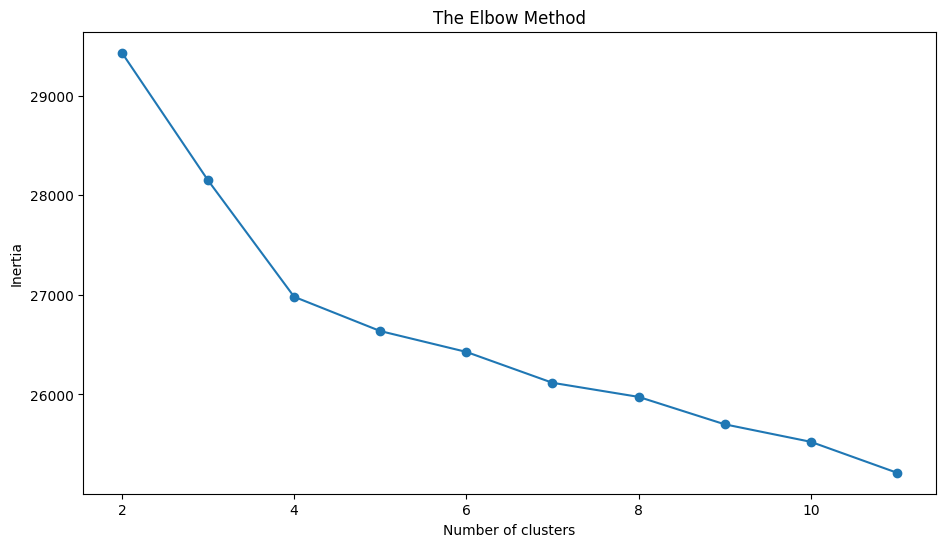

Cluster 1: Top Words - ['mcdonald', 'order', 'food', 'place', 'get', 'servic', 'time']
Cluster 2: Top Words - ['servic', 'fast', 'great', 'food', 'good', 'friendli', 'custom']
Cluster 3: Top Words - ['good', 'food', 'servic', 'place', 'coffe', 'alway', 'mcdonald']
Cluster 4: Top Words - ['excel', 'servic', 'attent', 'food', 'good', 'custom', 'staff']
Cluster 5: Top Words - ['neutral', 'forgiv', 'forgatten', 'foreverrrrr', 'forev', 'forest', 'foremost']
Silhouette Score: 0.1386701545916804


In [27]:
#k-means method
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn import metrics
from matplotlib import pyplot as plt

# Assuming the 'clean_text' column is present
df = pd.read_csv('McD_reviews.csv',encoding='latin-1')
df.dropna(inplace=True)

# Assuming 'clean_text' is the text column to be used
df["text_modified"] = df["review"].replace("\n", "")
operations = [remove_punctuation_and_special_chars, remove_nums, lower_all, remove_stopwords]

# Assuming these functions are defined
for op in operations:
    df["text_modified"] = df["text_modified"].apply(op)

# Tokenize and lemmatize/stem text
df['review_tls'] = df['text_modified'].apply(tokenize_sentence)

# TF-IDF Vectorization
tfidf_vect = TfidfVectorizer()
tfidf_vects = tfidf_vect.fit_transform(df['review_tls'].values.astype('U'))
names = tfidf_vect.get_feature_names_out()

# Elbow Method
scores = []
for i in range(2, 12):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=40)
    kmeans.fit(tfidf_vects)
    scores.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(11, 6))
plt.plot(range(2, 12), scores, marker="o")
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

# Fit KMeans with the chosen number of clusters (e.g., 5)
num_clusters = 5
model = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=10000, random_state=50)
model.fit(tfidf_vects)

# Cluster Analysis
cluster_center = model.cluster_centers_
centroids = model.cluster_centers_.argsort()[:, ::-1]

top_words = 7
for cluster_num in range(num_clusters):
    key_features = [names[i] for i in centroids[cluster_num, :top_words]]
    print(f'Cluster {cluster_num + 1}: Top Words - {key_features}')

# Silhouette Score
silhouette_score_tf = metrics.silhouette_score(tfidf_vects, model.labels_, metric='euclidean')
print(f'Silhouette Score: {silhouette_score_tf}')


In [30]:
#DBSCAN method
import pandas as pd
import gensim
import numpy as np
from sklearn.cluster import DBSCAN

# Assuming 'review_tls' is the column with tokenized and lemmatized/stemmed reviews
reviews = [str(i).split() for i in df['review_tls']]

# Train Word2Vec model
w2v_model = gensim.models.Word2Vec(reviews, vector_size=100, workers=4)

# Generate vectors
vectors = []
for review in reviews:
    vector = np.zeros(100)
    count = 0
    for word in review:
        try:
            vec = w2v_model.wv[word]
            vector += vec
            count += 1
        except:
            pass
    vector /= count
    vectors.append(vector)

vectors = np.array(vectors)
vectors = np.nan_to_num(vectors)

# Function to compute the 200th nearest neighbor distance
def compute_200th_nearest_neighbour(x, data):
    dists = []
    for val in data:
        dist = np.sum((x - val) ** 2)
        if len(dists) == 200 and dists[199] > dist:
            l = int(lower_bound(dists, dist))
            if 0 <= l < 200 and dists[l] > dist:
                dists[l] = dist
        else:
            dists.append(dist)
            dists.sort()

    return dists[104]

# Compute the 200th nearest neighbor distance for each vector
two_hundredth_neigh = [compute_200th_nearest_neighbour(val, vectors) for val in vectors]
two_hundredth_neigh.sort()

# Plotting for the Elbow Method
plt.figure(figsize=(14, 4))
plt.title("Elbow Method for Finding the right Eps hyperparameter")
plt.plot([x for x in range(len(two_hundredth_neigh))], two_hundredth_neigh)
plt.xlabel("Number of points")
plt.ylabel("Distance of 200th Nearest Neighbour")
plt.show()

# Choose an appropriate epsilon based on the plot, let's say 5
eps_value = 5

# Define minPts
minPts = 2 * 100

# Create and fit the DBSCAN model
model_dbs = DBSCAN(eps=eps_value, min_samples=minPts)
model_dbs.fit(vectors)

# Add cluster labels to the DataFrame
df['DBS Cluster Label'] = model_dbs.labels_

# Display the DataFrame with cluster labels
print(df)


<ipython-input-30-c61ad27048c8>:25: RuntimeWarning: invalid value encountered in divide
  vector /= count


NameError: ignored

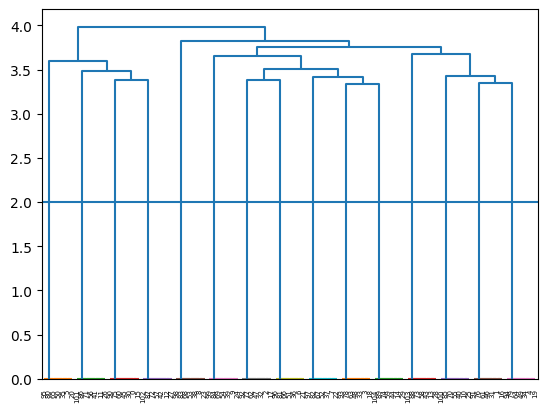

   document_id                                         clean_text Sentiment  \
0            0  entire movie looked like video game art budoka...  Positive   
1            1  im dragon ball fan time ive watched back child...  Positive   
2            2  ive seen movie cinema laugh much like humor mo...  Positive   
3            3  honest first really concerned cgianimation sin...  Positive   
4            4  dragon ball fan india delight watch theatre ma...  Positive   

                                       text_modified  \
0  entire movie looked like video game art budoka...   
1  im dragon ball fan time ive watched back child...   
2  ive seen movie cinema laugh much like humor mo...   
3  honest first really concerned cgianimation sin...   
4  dragon ball fan india delight watch theatre ma...   

                                          review_tls  DBS Cluster Label  \
0  entir movi look like video game art budokai te...                 -1   
1  dragon ball fan time ive watch back

In [ ]:
#Hierarchical clustering method
import scipy
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

# Assuming 'review_tls' is the column with tokenized and lemmatized/stemmed reviews
reviews = df['review_tls']

# Hierarchical clustering using dendrogram
dendro = hierarchy.dendrogram(hierarchy.linkage(tfidf_vects.toarray(), method='ward'))
plt.axhline(y=2)
plt.show()

# Agglomerative Clustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
agg_labels = cluster.fit_predict(tfidf_vects.toarray())
df['AVG-W2V Clus Label'] = agg_labels

# Displaying the DataFrame with cluster labels
print(df.head())

# Grouping and counting reviews in each cluster
hier_df = df
hier_df["Hierarchical Cluster Labels"] = agg_labels
cluster_counts = hier_df.groupby(["Hierarchical Cluster Labels"])["review_tls"].count()
print(cluster_counts)

# Silhouette Score for Agglomerative Clustering
silhouette_score_agg = metrics.silhouette_score(tfidf_vects.toarray(), agg_labels)
print(f"Silhouette Score for Agglomerative Clustering: {silhouette_score_agg}")


Shape of sentence vectors: (105, 100)


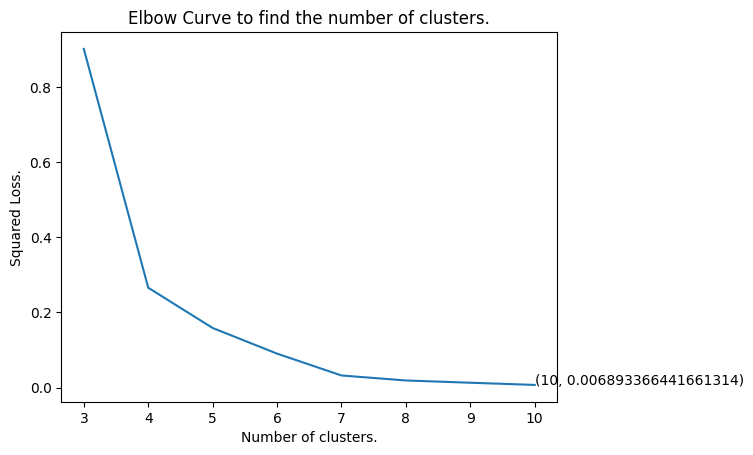

The optimal number of clusters obtained is -  10
The loss for the optimal cluster is -  0.006893366441661314
   document_id                                         clean_text Sentiment  \
0            0  entire movie looked like video game art budoka...  Positive   
1            1  im dragon ball fan time ive watched back child...  Positive   

                                       text_modified  \
0  entire movie looked like video game art budoka...   
1  im dragon ball fan time ive watched back child...   

                                          review_tls  DBS Cluster Label  \
0  entir movi look like video game art budokai te...                 -1   
1  dragon ball fan time ive watch back childhood ...                 -1   

   AVG-W2V Clus Label  Hierarchical Cluster Labels  AVG-W2V Word2Vec Label  
0                   1                            1                       6  
1                   0                            0                       8  
Silhouette Score for Word2V

In [ ]:
#Word2Vec method
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt

# Assuming 'df' contains your DataFrame with 'review_tls' column
i = 0
list_of_sent = []
for sent in df['review_tls'].values:
    list_of_sent.append(sent.split())

import gensim
# Training the word2vec model using the train dataset
w2v_model = gensim.models.Word2Vec(list_of_sent, vector_size=100, workers=4)

# Computing sentence vectors
sent_vectors = []
for sent in list_of_sent:
    sent_vec = np.zeros(100)
    cnt_words = 0
    for word in sent:
        try:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
sent_vectors = np.array(sent_vectors)
sent_vectors = np.nan_to_num(sent_vectors)
print("Shape of sentence vectors:", sent_vectors.shape)

# Number of clusters to check.
num_clusters = [x for x in range(3, 11)]

# Compute squared errors for different number of clusters
squared_errors = []
for cluster in num_clusters:
    kmeans = KMeans(n_clusters=cluster).fit(sent_vectors)
    squared_errors.append(kmeans.inertia_)

# Find the optimal number of clusters
optimal_clusters = np.argmin(squared_errors) + 3

# Plot the Elbow Curve
plt.plot(num_clusters, squared_errors)
plt.title("Elbow Curve to find the number of clusters.")
plt.xlabel("Number of clusters.")
plt.ylabel("Squared Loss.")
xy = (optimal_clusters, min(squared_errors))
plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
plt.show()

print("The optimal number of clusters obtained is - ", optimal_clusters)
print("The loss for the optimal cluster is - ", min(squared_errors))

# Training the best model
model_w2v = KMeans(n_clusters=optimal_clusters)
model_w2v.fit(sent_vectors)
word_cluster_pred = model_w2v.predict(sent_vectors)
word_cluster_pred_2 = model_w2v.labels_
word_cluster_center = model_w2v.cluster_centers_

# Adding cluster labels to the DataFrame
df['AVG-W2V Word2Vec Label'] = model_w2v.labels_

# Display the DataFrame with cluster labels
print(df.head(2))

# Compute Silhouette Score
silhouette_score_w2v = metrics.silhouette_score(sent_vectors, word_cluster_pred_2, metric='euclidean')
print("Silhouette Score for Word2Vec Clustering:", silhouette_score_w2v)


In [ ]:
import numpy as np
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModel
from sklearn.cluster import KMeans
from sklearn import metrics

# Load BERT model and tokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
model = AutoModel.from_pretrained('bert-base-uncased')

def generate_bert_embedding(text):
    input_ids = torch.tensor(tokenizer.encode(text, add_special_tokens=True)).unsqueeze(0)
    outputs = model(input_ids)
    last_hidden_states = outputs[0][:, 0, :].detach().numpy()
    return last_hidden_states.flatten()  # Flatten the array

# Load text data
text_data = df['review_tls'].tolist()

# Generate BERT embeddings for text data
embeddings = np.array([generate_bert_embedding(text) for text in text_data])

# Cluster BERT embeddings using KMeans
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(embeddings)

# Assign cluster labels to text data
df['cluster'] = kmeans.labels_

# Print the number of texts in each cluster
print(df['cluster'].value_counts())

# Compute Silhouette Score
silhouette_score_bert = metrics.silhouette_score(embeddings, kmeans.labels_, metric='euclidean')
print("Silhouette Score for BERT Clustering:", silhouette_score_bert)


4    35
3    28
1    21
2    14
0     7
Name: cluster, dtype: int64
Silhouette Score for BERT Clustering: 0.3769749


In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.

"K-means clustering relies on measuring the distances between data points and the centroids of clusters, with the goal of dividing the data into distinct groups based on their proximity. In contrast, DBSCAN places its focus on density, aiming to identify regions where data points are densely concentrated and differentiate them from sparser regions. Hierarchical clustering works in layers, initially treating each data point as an individual cluster and then gradually merging clusters that are closer to each other. Word2Vec involves the transformation of sentences into lists of words and subsequently into frequency vectors, which capture word relationships and suggest synonyms. BERT, short for 'bi-directional encoder,' establishes dynamic connections between every input and output element. To assess the performance of clustering, Silhouette scores were calculated, with Word2Vec achieving the highest score of 0.817. A score of 1 indicates optimal compactness within a cluster and significant separation from other clusters."





